In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso

In [130]:
data = pd.read_csv('data/tracks_no_duplicate.csv', encoding='utf-8', index_col=False)
one_hot = pd.get_dummies(data['genre'], prefix='genre').iloc[:, :-1]
df = pd.concat([data.iloc[:, 4:-1], one_hot[:]], axis=1)
formula = 'popularity ~ '
for i, c in enumerate(df.columns[1:]):
    if c == 'release_date':
        continue
    if i != 0:
        formula += ' + '
    formula += f'Q("{c}")'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     182.0
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        21:11:24   Log-Likelihood:                -41075.
No. Observations:               10963   AIC:                         8.240e+04
Df Residuals:                   10837   BIC:                         8.332e+04
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       43.5138      1.537     28.309      0.000      40.501      46.527
Q("acousticness")               -1.0151      0.528     -1.923      0.055      -2.050       0.020
Q("danceability")                2.2114      0.848      2.608      0.009       0.549       3.873
Q("energy")                     -3.3839      0.884     -3.828      0.000      -5.116      -1.651
Q("instrumentalness")           -2.1547      0.436     -4.944      0.000      -3.009      -1.300
Q("liveness")                   -2.1154      0.614     -3.446      0.001      -3.319      -0.912
Q("speechiness")                -4.2002      1.328     -3.162      0.002      -6.804      -1.597
Q("duration_ms")              9.338e-08   1.08e-06      0.087      0.931   -2.02e-06    2.21e-06
Q("key")                        -0.0186      0.028     -0.660      0.509      -0.074       0.037
Q("loadness")                    0.2280      0.039      5.878      0.000       0.152       0.304
Q("mode")                       -0.6665      0.215     -3.093      0.002      -1.089      -0.244
Q("tempo")                   -8.679e-05      0.004     -0.024      0.981      -0.007       0.007
Q("valence")                    -0.5078      0.526     -0.966      0.334      -1.538       0.522
Q("available_market")            0.0691      0.005     14.524      0.000       0.060       0.078
Q("explicit")                    1.6244      0.414      3.921      0.000       0.812       2.436
Q("genre_acoustic")              0.5366      1.472      0.364      0.716      -2.350       3.423
Q("genre_afrobeat")            -10.9914      1.485     -7.400      0.000     -13.903      -8.080
Q("genre_alt-rock")             17.1165      1.487     11.512      0.000      14.202      20.031
Q("genre_alternative")          19.6292      1.513     12.970      0.000      16.663      22.596
Q("genre_ambient")               4.9480      1.525      3.245      0.001       1.959       7.937
Q("genre_anime")                -1.4090      1.475     -0.955      0.339      -4.300       1.482
Q("genre_black-metal")         -12.3711      1.493     -8.285      0.000     -15.298      -9.444
Q("genre_bluegrass")            -8.9723      1.478     -6.070      0.000     -11.870      -6.075
Q("genre_blues")                 7.1959      1.497      4.807      0.000       4.262      10.130
Q("genre_brazil")               -6.6913      1.490     -4.491      0.000      -9.612      -3.771
Q("genre_breakbeat")           -17.8019      1.491    -11.938      0.000     -20.725     -14.879
Q("genre_british")               6.3538      1.486      4.277      0.000       3.441       9.266
Q("genre_cantopop")             -8.3031      1.471     -5.644      0.000     -11.187      -5.420
Q("genre_chicago-house")       -20.7589      1.503    -13.807      0.000    

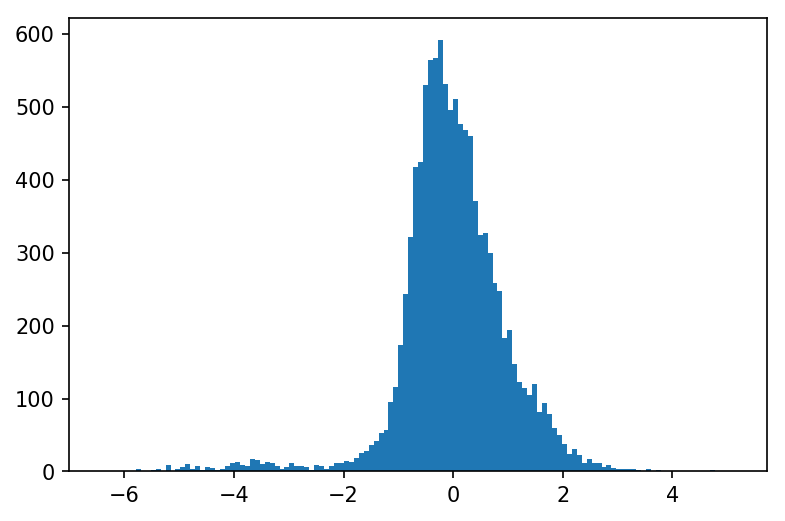

In [131]:
_ = plt.hist(model.resid_pearson, bins = 'auto')

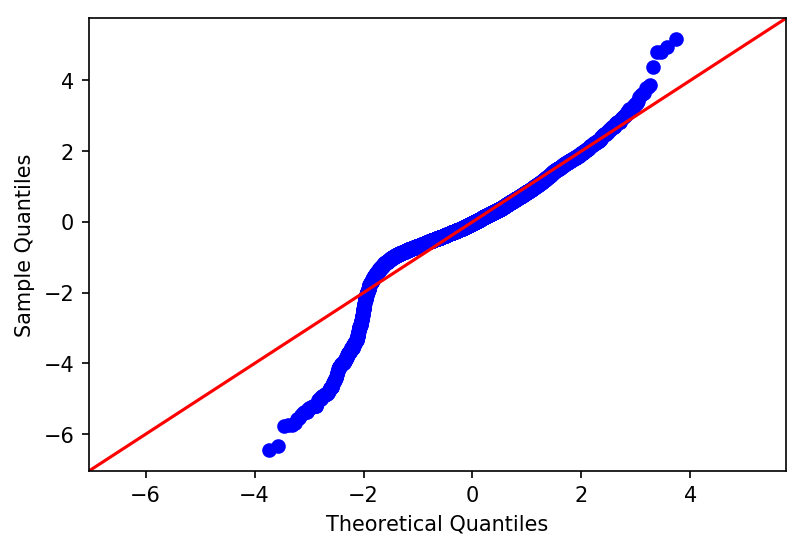

In [132]:
fig = sm.qqplot(model.resid_pearson, stats.norm, fit=True, line='45')

In [133]:
stat, p = stats.shapiro(model.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.910, p=0.000


C:\Users\ray\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


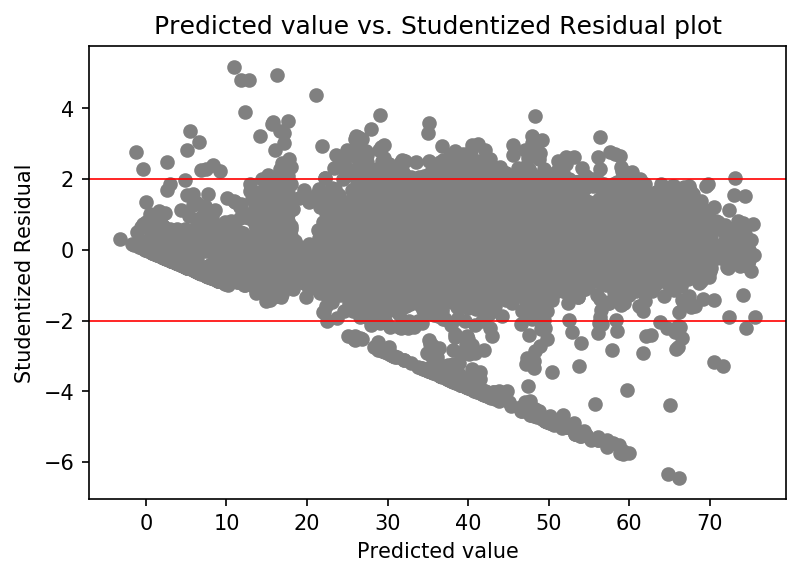

In [134]:
st, data1, ss2 = sso.summary_table(model, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
x = data1[:, 2]
#Studentized Residual
y = data1[:, 10]

plt.plot(x, y, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Predicted value vs. Studentized Residual plot')
plt.xlabel('Predicted value')
plt.ylabel('Studentized Residual')
plt.show()

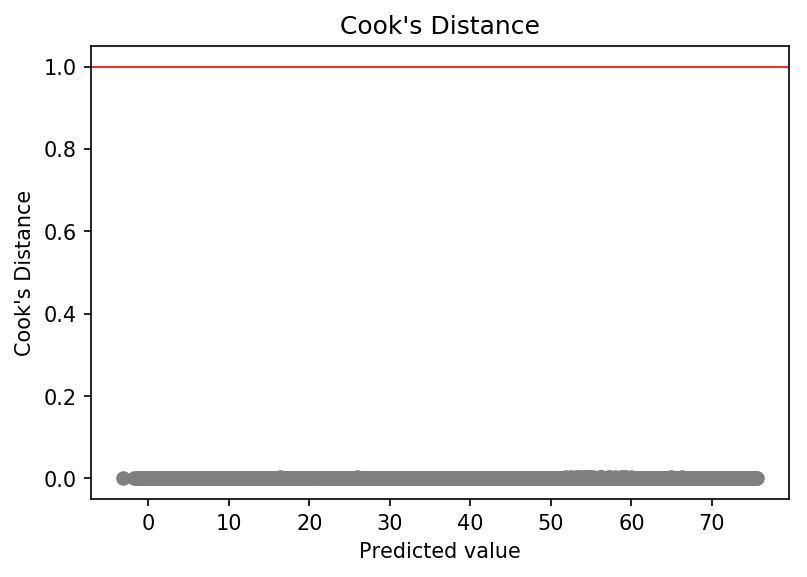

In [135]:
x = data1[:, 2]
cook_dist = data1[:, 11]
plt.plot(x, cook_dist, 'o', color = 'gray')
plt.axhline(y=1, color = 'red', lw = 0.8)
plt.title("Cook's Distance")
plt.xlabel('Predicted value')
plt.ylabel("Cook's Distance")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     33.53
Date:                Mon, 25 May 2020   Prob (F-statistic):           3.35e-70
Time:                        22:17:43   Log-Likelihood:                -3194.3
No. Observations:                 787   AIC:                             6419.
Df Residuals:                     772   BIC:                             6489.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                33.03

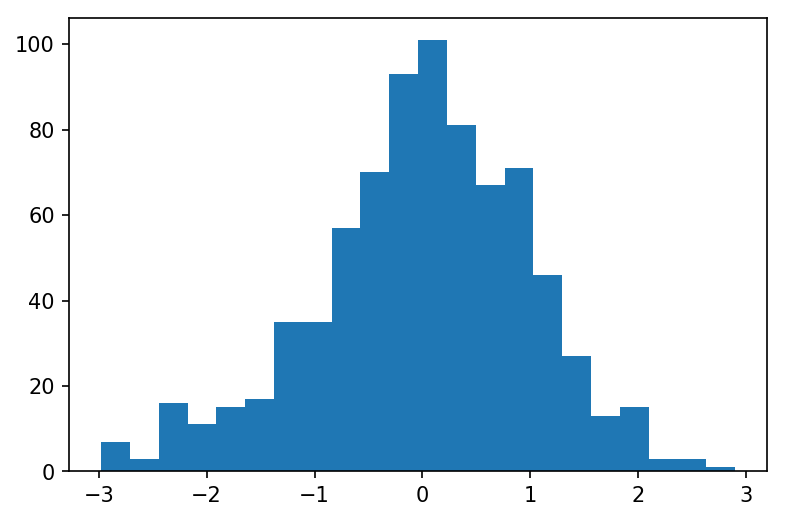

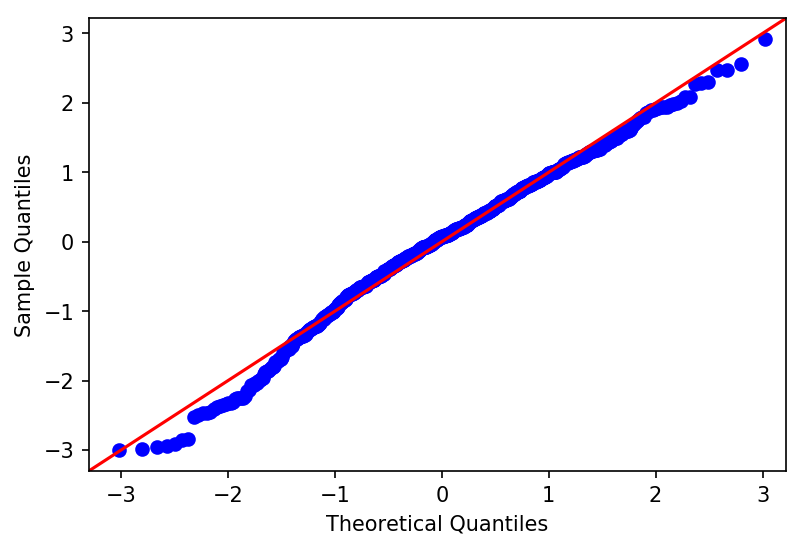

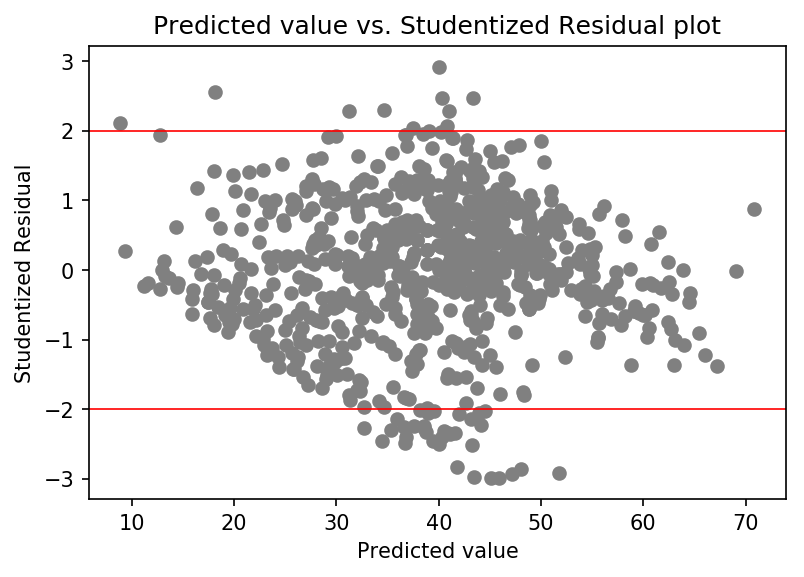

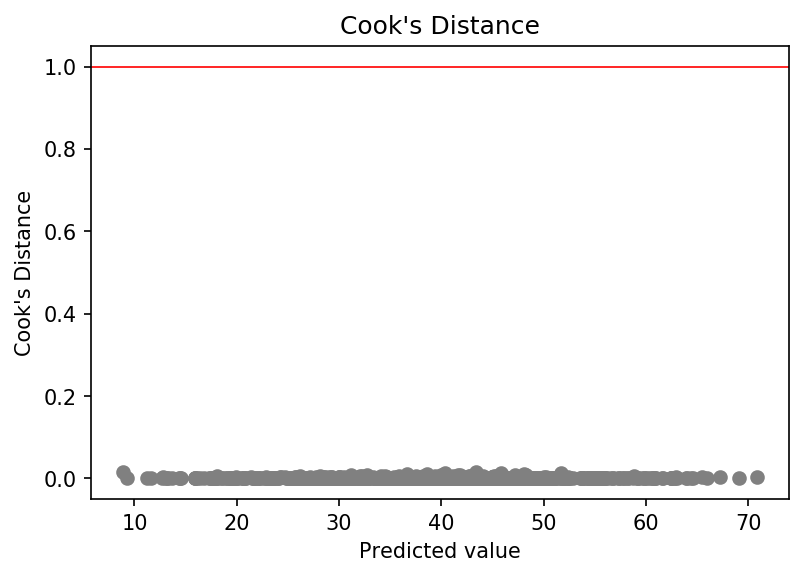

In [187]:
## model
a = ['death-metal', 'black-metal', 'heavy-metal', 'metal', 'metalcore', 'grindcore', 'hardcore', 'emo']
data_metal = data.iloc[[g in a for g in data["genre"]], :]
one_hot_metal = pd.get_dummies(data_metal['genre'], prefix='genre').iloc[:, :-1]
## df_metal = pd.concat([data_metal.iloc[:, 4:-1], one_hot_metal[:]], axis=1)
df_metal = data_metal.iloc[:, 4:-1]
formula_metal = 'popularity ~ '
for i, c in enumerate(df_metal.columns[1:]):
    if c == 'release_date':
        continue
    if i != 0:
        formula_metal += ' + '
    formula_metal += f'Q("{c}")'
model_metal = smf.ols(formula_metal, data=df_metal).fit()
print(model_metal.summary())

## normality assumption
stat, p = stats.shapiro(model_metal.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

_ = plt.hist(model_metal.resid_pearson, bins = 'auto')
plt.show()

fig = sm.qqplot(model_metal.resid_pearson, stats.norm, fit=True, line='45')
plt.show()

st, data_metal1, ss2 = sso.summary_table(model_metal, alpha=0.05)

## Residual analysis
#Predicted value
x = data_metal1[:, 2]
#Studentized Residual
y = data_metal1[:, 10]

plt.plot(x, y, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Predicted value vs. Studentized Residual plot')
plt.xlabel('Predicted value')
plt.ylabel('Studentized Residual')
plt.show()

x = data_metal1[:, 2]
cook_dist = data_metal1[:, 11]
plt.plot(x, cook_dist, 'o', color = 'gray')
plt.axhline(y=1, color = 'red', lw = 0.8)
plt.title("Cook's Distance")
plt.xlabel('Predicted value')
plt.ylabel("Cook's Distance")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.641
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.30e-09
Time:                        22:24:44   Log-Likelihood:                -1160.6
No. Observations:                 292   AIC:                             2351.
Df Residuals:                     277   BIC:                             2406.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.86

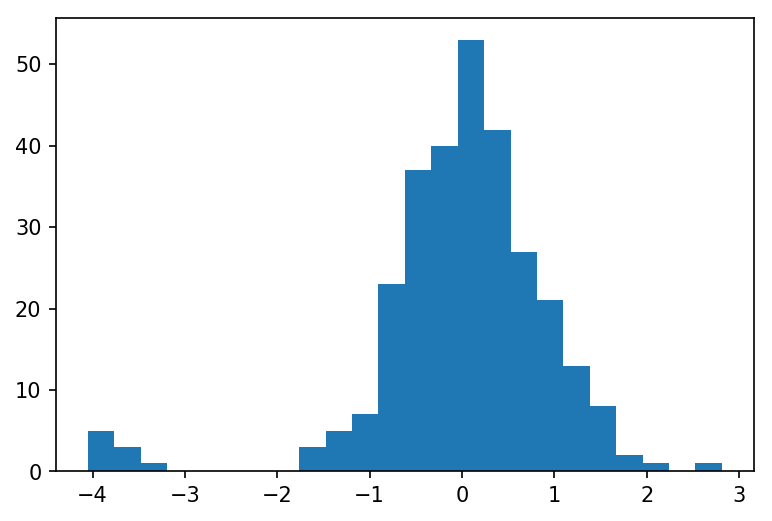

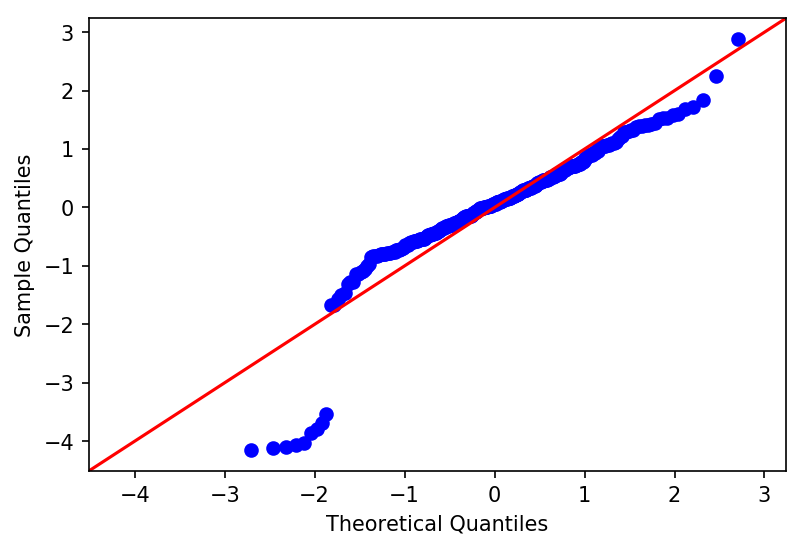

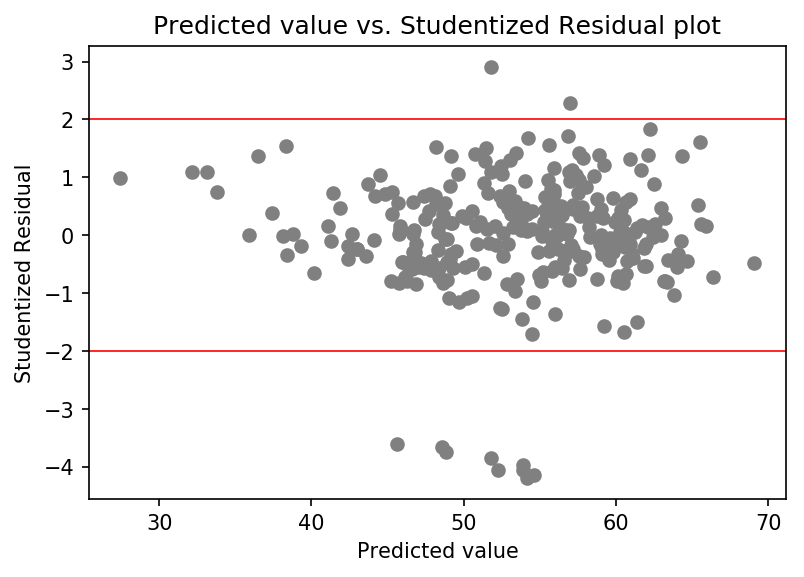

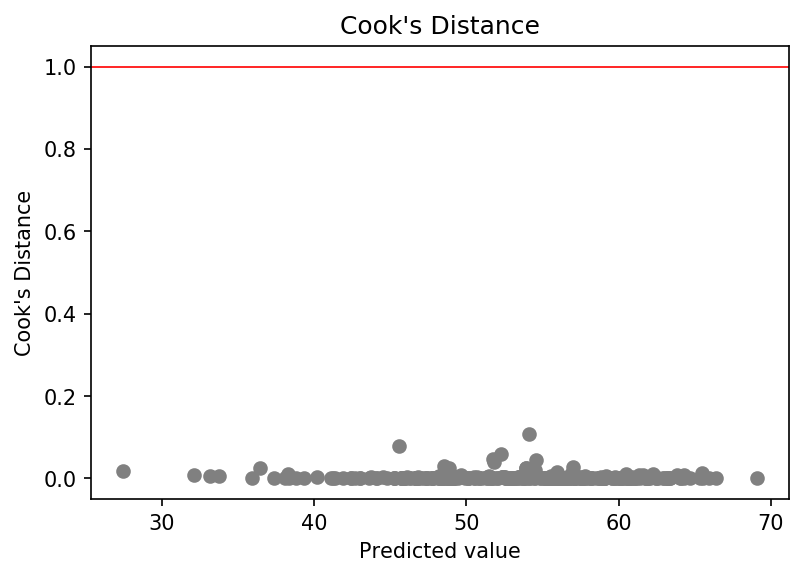

In [196]:
## model
i = ['reggae', 'reggaeton', 'ska']
data_reggae = data.iloc[[g in i for g in data["genre"]], :]
one_hot_reggae = pd.get_dummies(data_reggae['genre'], prefix='genre').iloc[:, :-1]
## df_metal = pd.concat([data_metal.iloc[:, 4:-1], one_hot_metal[:]], axis=1)
df_reggae = data_reggae.iloc[:, 4:-1]
formula_reggae = 'popularity ~ '
for i, c in enumerate(df_reggae.columns[1:]):
    if c == 'release_date':
        continue
    if i != 0:
        formula_reggae += ' + '
    formula_reggae += f'Q("{c}")'
model_reggae = smf.ols(formula_reggae, data=df_reggae).fit()
print(model_reggae.summary())

## normality assumption
stat, p = stats.shapiro(model_reggae.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

_ = plt.hist(model_reggae.resid_pearson, bins = 'auto')
plt.show()

fig = sm.qqplot(model_reggae.resid_pearson, stats.norm, fit=True, line='45')
plt.show()

st, data_reggae1, ss2 = sso.summary_table(model_reggae, alpha=0.05)

## Residual analysis
#Predicted value
x = data_reggae1[:, 2]
#Studentized Residual
y = data_reggae1[:, 10]

plt.plot(x, y, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Predicted value vs. Studentized Residual plot')
plt.xlabel('Predicted value')
plt.ylabel('Studentized Residual')
plt.show()

cook_dist = data_reggae1[:, 11]
plt.plot(x, cook_dist, 'o', color = 'gray')
plt.axhline(y=1, color = 'red', lw = 0.8)
plt.title("Cook's Distance")
plt.xlabel('Predicted value')
plt.ylabel("Cook's Distance")
plt.show()

In [198]:
data_reggae[abs(data_reggae1[:, 10]) > 2]

,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit,idx
8652,4VgYtXCVJ7IbWAZ5ryfvEQ,Muévelo,reggae,https://open.spotify.com/track/4VgYtXCVJ7IbWAZ...,86.0,0.416000,0.595,0.807,0.000014,0.5650,...,194892.0,7.0,-2.409,1.0,188.081,0.919,78.0,2020-01-08,0.0,8848
8662,1ABoBOEFEa1ZRQkVA2AqMs,Perdóname,reggae,https://open.spotify.com/track/1ABoBOEFEa1ZRQk...,1.0,0.258000,0.676,0.786,0.000000,0.1450,...,244920.0,9.0,-6.918,0.0,95.003,0.392,73.0,2020-05-15,0.0,8859
8674,6oKyeAfc6LwJA8uhpM79N6,Mayor Que Yo 3,reggae,https://open.spotify.com/track/6oKyeAfc6LwJA8u...,0.0,0.080400,0.755,0.960,0.000000,0.2540,...,306280.0,1.0,-3.611,0.0,92.002,0.449,73.0,2020-05-15,0.0,8871
8688,2ppBhkX95iS3JyiRxVLH90,Mar de gente,reggae,https://open.spotify.com/track/2ppBhkX95iS3Jyi...,0.0,0.005300,0.696,0.878,0.258000,0.2330,...,335866.0,11.0,-5.303,0.0,108.615,0.886,79.0,2020-05-15,0.0,8885
8724,50oZp4L5WvoHM8lKWMcbt2,Na De Na,reggaeton,https://open.spotify.com/track/50oZp4L5WvoHM8l...,1.0,0.154000,0.878,0.902,0.000000,0.1920,...,204653.0,6.0,-5.791,1.0,119.929,0.660,73.0,2020-05-15,0.0,8924
8729,5K0cPWxF7HgbMocoPFibkp,Boomerang,reggaeton,https://open.spotify.com/track/5K0cPWxF7HgbMoc...,2.0,0.221000,0.603,0.661,0.000303,0.0997,...,181045.0,0.0,-5.857,0.0,92.134,0.919,73.0,2020-05-08,0.0,8929
8730,6zEgnpM0qYmHLDnh8WPejL,Amarillo,reggaeton,https://open.spotify.com/track/6zEgnpM0qYmHLDn...,89.0,0.013000,0.641,0.857,0.005340,0.0695,...,157733.0,1.0,-5.725,0.0,122.728,0.961,79.0,2020-03-19,0.0,8930
8732,7s3iNA0tRaqszAKHNRIHqO,Sexo En La Playa,reggaeton,https://open.spotify.com/track/7s3iNA0tRaqszAK...,2.0,0.360000,0.794,0.708,0.000018,0.3220,...,218386.0,5.0,-7.053,1.0,94.004,0.613,73.0,2020-05-08,0.0,8932
8771,0D8eMkq0BMrUbdTh0fiyfc,Sola,reggaeton,https://open.spotify.com/track/0D8eMkq0BMrUbdT...,1.0,0.293000,0.626,0.690,0.000000,0.6300,...,175613.0,10.0,-6.995,0.0,179.803,0.491,73.0,2020-05-15,0.0,8972
8783,1P3lEcquetmEMSiocW5R3j,Sexo En La Playa,reggaeton,https://open.spotify.com/track/1P3lEcquetmEMSi...,1.0,0.360000,0.794,0.708,0.000018,0.3220,...,218386.0,5.0,-7.053,1.0,94.004,0.613,73.0,2020-05-15,0.0,8984
